In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

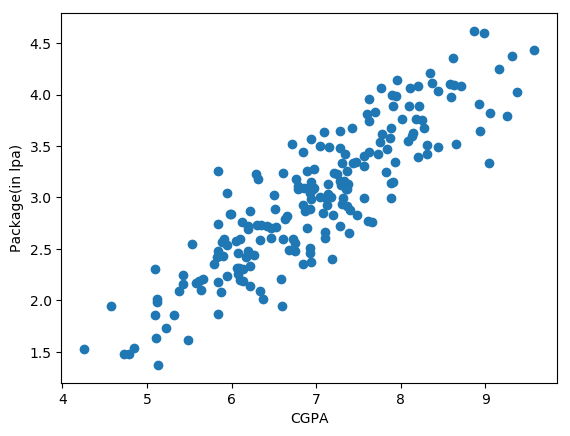

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
X = df.iloc[:,0:1] #Extracting independent variable
y = df.iloc[:,-1] #Extracting dependent variable

In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
5      2.99
6      2.60
7      2.48
8      2.31
9      3.51
10     1.86
11     2.60
12     3.65
13     2.89
14     3.42
15     3.23
16     2.35
17     2.09
18     2.98
19     2.83
20     3.16
21     2.93
22     2.30
23     2.48
24     2.71
25     3.65
26     3.42
27     2.16
28     2.24
29     3.49
       ... 
170    2.87
171    3.76
172    2.51
173    2.56
174    2.99
175    3.50
176    3.23
177    3.64
178    3.63
179    3.03
180    2.72
181    3.89
182    2.08
183    2.72
184    3.14
185    3.18
186    3.47
187    2.44
188    3.08
189    4.06
190    2.69
191    3.48
192    3.75
193    1.94
194    3.67
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) #Splitting data into training and testing set. 

c:\Users\KRISHNA\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [9]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression() #Creating object of LinearRegression class

In [ ]:
lr.fit(X_train,y_train) #Fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0, 0.5, 'Package(in lpa)')

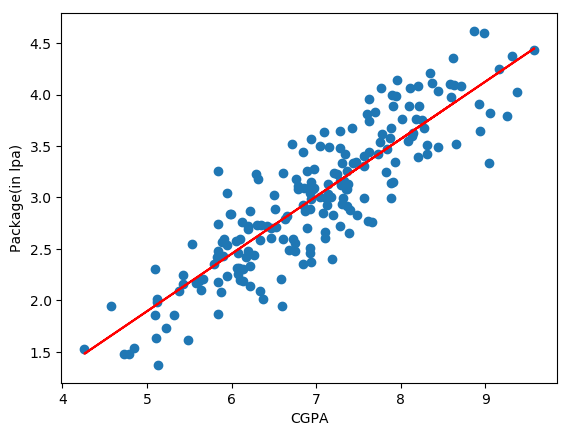

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
y_pred = lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [17]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [18]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [19]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [20]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [21]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [22]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.409545,3.26
1,5.12,0.001411,1.98
2,7.82,0.393921,3.25
3,7.42,0.823048,3.67
4,6.94,0.777398,3.57


Text(0, 0.5, 'Package(in lpa)')

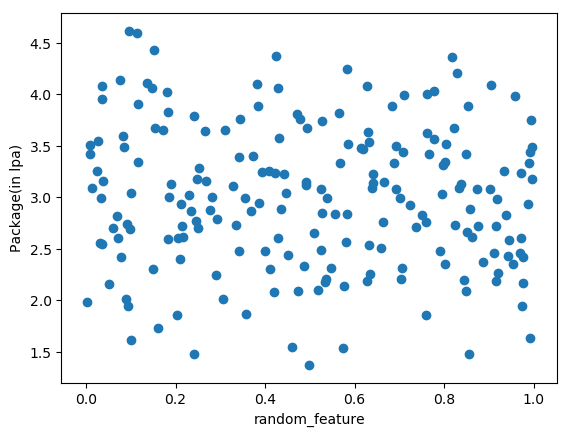

In [23]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [24]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7766883388350027


In [30]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7646174382314893

In [31]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [32]:
new_df2.sample(5)

,cgpa,iq,package
144,6.17,1.42,2.42
70,5.79,1.45,2.35
67,6.51,3.49,2.89
109,7.77,4.86,4.06
130,6.68,1.99,2.49


Text(0, 0.5, 'Package(in lpa)')

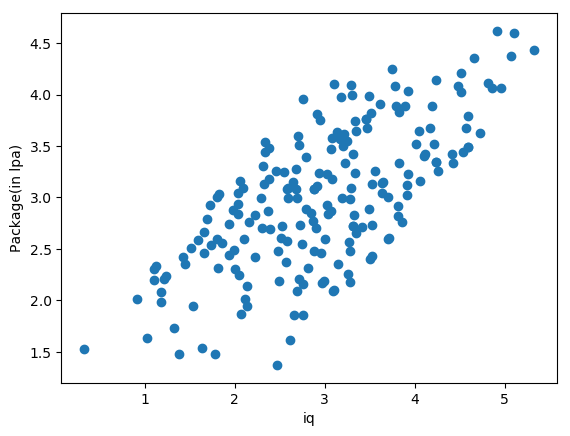

In [33]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [34]:
np.random.randint(-100,100)

-77

In [35]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [39]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8255568738594342


In [40]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8161275156896739